## ML ,DL, BERT Model Performance Comparision for web service categories

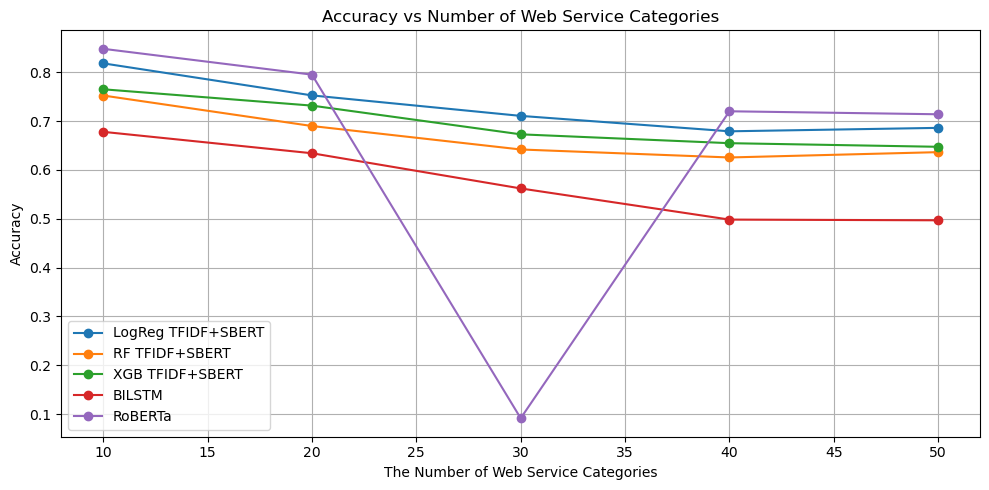

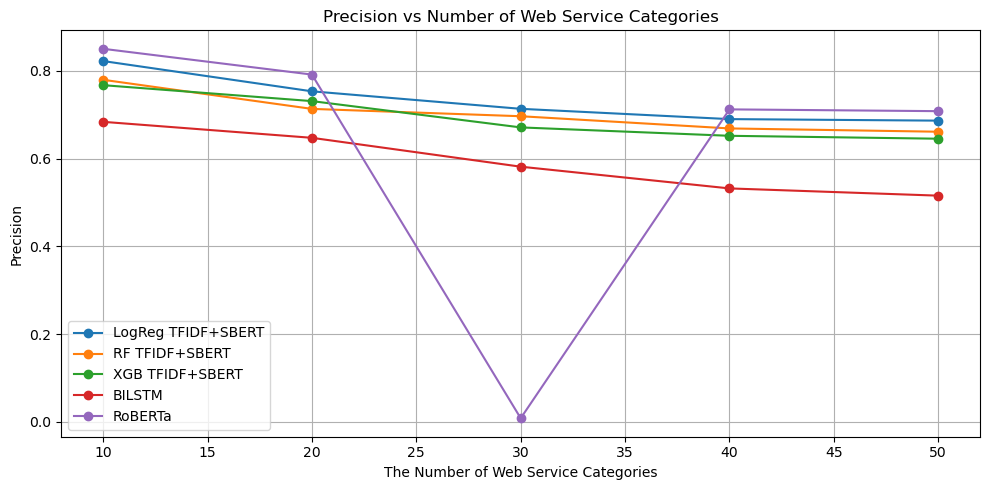

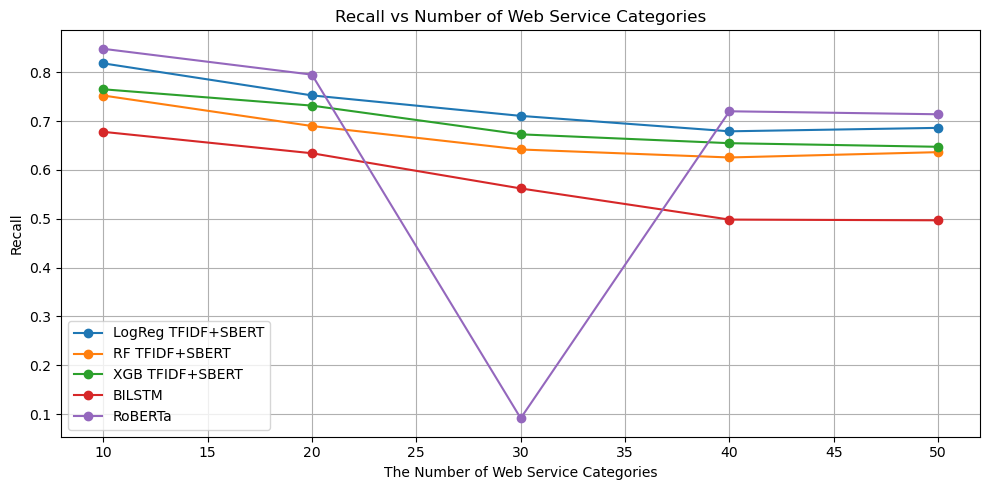

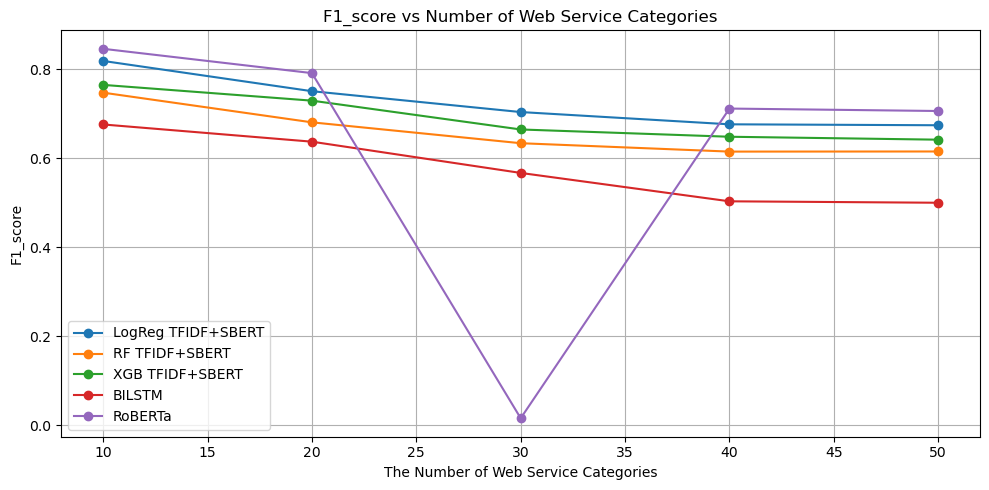

In [12]:
import pickle
import matplotlib.pyplot as plt
import seaborn


with open("results/ml_final_results.pkl", "rb") as f:
    ml_final_results = pickle.load(f)
    
with open("results/dl_final_results.pkl", "rb") as f:
    dl_final_results = pickle.load(f)
    
with open("results/bert_roberta_results.pkl", "rb") as f:
    bert_results = pickle.load(f)
    
bert_final_results = {
    n: [{
        "model": "RoBERTa Top " + str(n),
        "accuracy": results["accuracy"],
        "precision": results["precision"],
        "recall": results["recall"],
        "f1_score": results["f1_score"]
    }]
    for n, results in bert_results.items()
}
        
model_metrics = {}

for n, results in ml_final_results.items():
    for entry in results:
        model = entry['model'].split('Top')[0].strip()  
        if model not in model_metrics:
            model_metrics[model] = {'n': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        
        model_metrics[model]['n'].append(n)
        model_metrics[model]['accuracy'].append(entry['accuracy'])
        model_metrics[model]['precision'].append(entry['precision'])
        model_metrics[model]['recall'].append(entry['recall'])
        model_metrics[model]['f1_score'].append(entry['f1_score'])

for n, results in dl_final_results.items():
    for entry in results:
        model = entry['model'].split('Top')[0].strip()  
        if model not in model_metrics:
            model_metrics[model] = {'n': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        
        model_metrics[model]['n'].append(n)
        model_metrics[model]['accuracy'].append(entry['accuracy'])
        model_metrics[model]['precision'].append(entry['precision'])
        model_metrics[model]['recall'].append(entry['recall'])
        model_metrics[model]['f1_score'].append(entry['f1_score'])   

for n, results in bert_final_results.items():
    for entry in results:
        model = entry['model'].split('Top')[0].strip()  
        if model not in model_metrics:
            model_metrics[model] = {'n': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}
        
        model_metrics[model]['n'].append(n)
        model_metrics[model]['accuracy'].append(entry['accuracy'])
        model_metrics[model]['precision'].append(entry['precision'])
        model_metrics[model]['recall'].append(entry['recall'])
        model_metrics[model]['f1_score'].append(entry['f1_score']) 
        
def plot_metric(metric_name):
    plt.figure(figsize=(10, 5))
    for model, data in model_metrics.items():
        plt.plot(data['n'], data[metric_name], marker='o', label=model)
    plt.title(f'{metric_name.capitalize()} vs Number of Web Service Categories')
    plt.xlabel('The Number of Web Service Categories')
    plt.ylabel(metric_name.capitalize())
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metric('accuracy')
plot_metric('precision')
plot_metric('recall')
plot_metric('f1_score')